In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [3]:
import pickle
with open('./data/melted_zip5.pickle', 'rb') as file:
    melted_zip5 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip5.head()

,value
time,
1996-04-01,49500.0
1996-05-01,50100.0
1996-06-01,50600.0
1996-07-01,51100.0
1996-08-01,51700.0


In [5]:
ts1 = melted_zip5['2010-01-01':]
ts1

,value
time,
2010-01-01,81000.0
2010-02-01,81200.0
2010-03-01,81300.0
2010-04-01,81200.0
2010-05-01,81400.0
...,...
2017-12-01,95400.0
2018-01-01,95000.0
2018-02-01,97500.0


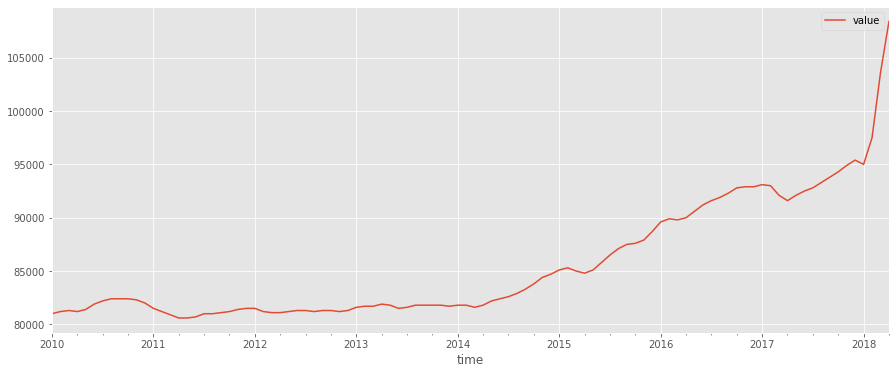

              value
time               
2010-01-01  81000.0
2010-02-01  81200.0
2010-03-01  81300.0
2010-04-01  81200.0
2010-05-01  81400.0


In [6]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [9]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(ts1['value'])

# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dftest)

# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)

In [10]:
# # Difference the time series
# ts1_diff = ts1.diff().dropna()
# ts1_diff

In [11]:
# ts1_diff.plot(figsize=(15,6))
# plt.show()


In [12]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [13]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2532.227821135157
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2438.333136731138
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2363.301208819439
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1611.1587908047081
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1505.1985157506679
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1451.8088641334325
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1503.4507771933415
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1481.8515551267196
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1448.2541103959556
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1616.3921249239463
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1513.3307941648225
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1468.649501517523
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1519.2252259590675
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1488.5593989018878
ARIMA (0, 0, 0) x (1, 1,

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1456.1841065677463
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1446.4457780609216
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1468.9833444247765
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1449.9056917305656
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1425.6849357913864
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1512.829315443308
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1452.1379739312868
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1423.256950950358
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1473.8356522740387
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1475.6410016754426
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1441.1893332997445
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1448.8408550715217
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1434.5438994433507
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1419.9525412746175
ARIMA (0, 1, 1) x (2, 

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1420.750057660332
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1446.6847619060866
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1415.631659484245
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1390.0046797426858
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1466.3600684355313
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1440.4078031091442
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1400.781502714378
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1616.3921249239463
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1551.3562034244633
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1518.8822397984266
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1519.2252259590675
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1488.5593988908647
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1452.972842951443
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1503.7578220950506
ARIMA (1, 0, 0) x (0, 2,

ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1449.9056917318032
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1425.6849358049594
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1512.829315469237
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1452.1379739961085
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1423.2603002804497
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1476.996920633723
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1456.114669253068
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1446.7828430918048
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1470.3576423593313
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1455.712388985043
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1426.8975450141613
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1508.1504873264735
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1470.0407571093751
ARIMA (1, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1424.7959220776054
ARIMA (1, 1, 1) x (2, 0,

ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1403.581011156042
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1498.5561344344194
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1438.5934945169756
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1433.8416019565377
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1435.4415275503402
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1421.9504230080329
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1410.5663794926347
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1426.483596853533
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1408.6755543316578
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1391.7083855130945
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1468.2508005934715
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1439.2798778245126
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1420.3840747049894
ARIMA (2, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1519.5773996903297
ARIMA (2, 0, 0) x (0, 

ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1416.0417013611925
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1416.4477889698373
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1473.8356523267366
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1475.4075479521798
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1443.415516472405
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1448.843946004468
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1434.5522124209688
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1419.9611203560328
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1449.5060705115848
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1435.1285626178612
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1415.6315700755308
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1459.323303336118
ARIMA (2, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1466.0440523508466
ARIMA (2, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1450.0446163024537
ARIMA (2, 1, 1) x (1, 1

ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1395.1365308322897
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1436.1093231177629
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1421.9504231244791
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1409.6746838517217
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1426.661265388488
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1408.6733430947759
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1398.0908157642564
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1469.8320897700444
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1419.0061991429827
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1391.0804947964336
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1420.7852278956975
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1422.6268396687422
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1411.212526056405
ARIMA (2, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1416.4530809890157
ARIMA (2, 2, 2) x (2, 

In [14]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 2)
pdqs    (2, 2, 2, 1)
aic             1390
Name: 161, dtype: object

In [36]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(2, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9476      0.297      3.186      0.001       0.365       1.531
ma.L2          0.4269      0.310      1.377      0.168      -0.181       1.034
ar.S.L1        0.2892      0.253      1.144      0.252      -0.206       0.784
ar.S.L2       -0.8034      0.208     -3.854      0.000      -1.212      -0.395
ma.S.L1       -1.7444      0.136    -12.847      0.000      -2.011      -1.478
ma.S.L2        0.8628      0.120      7.182      0.000       0.627       1.098
sigma2      1.766e+05   2.07e+04      8.550      0.000    1.36e+05    2.17e+05


C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


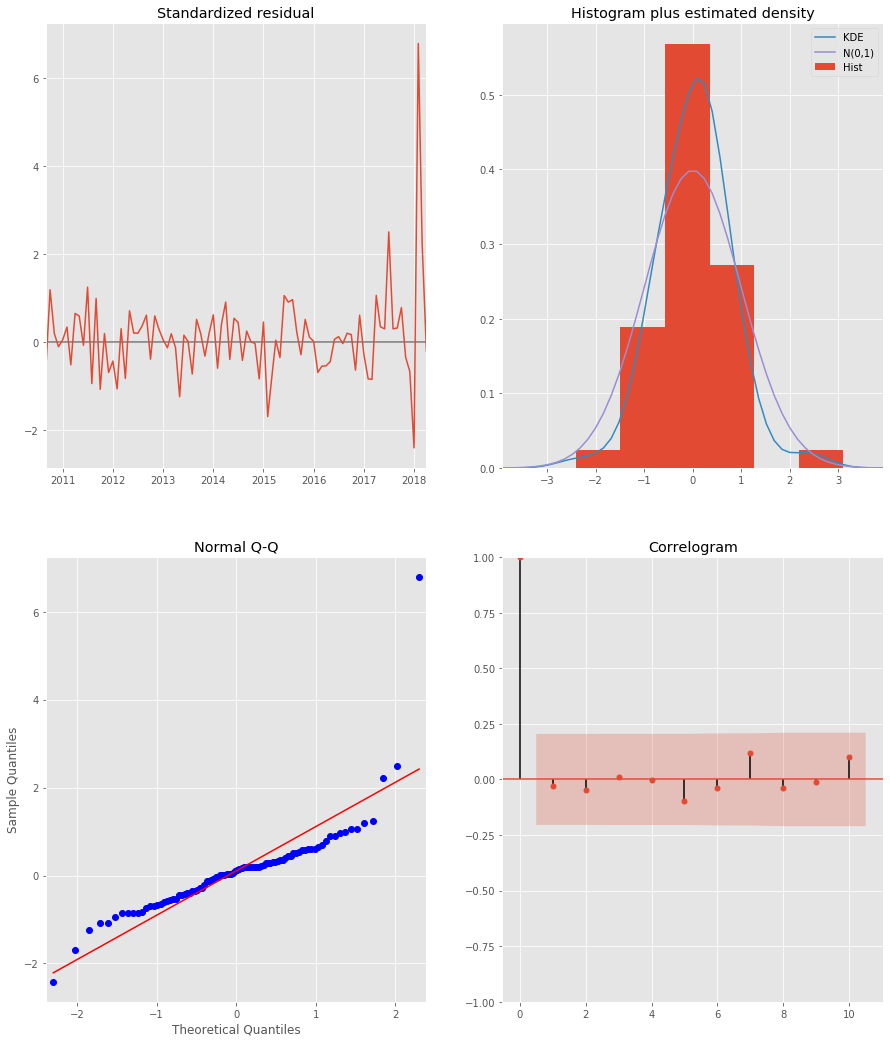

In [37]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [38]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

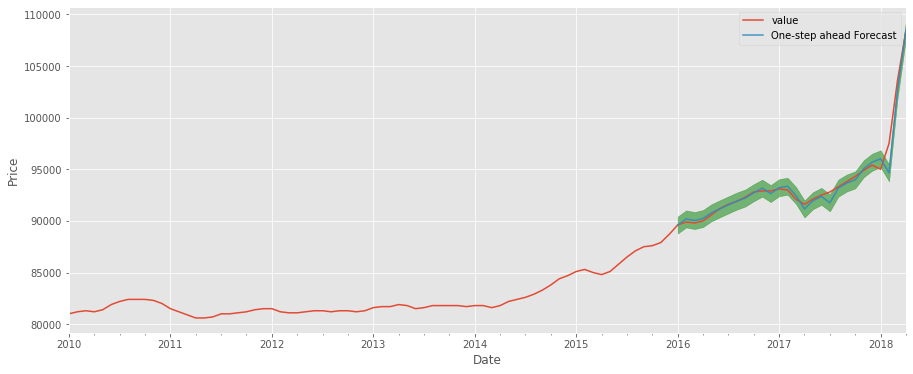

In [39]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [40]:
# pred.predicted_mean

In [41]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 661.82


## Dynamic Forecasting

In [11]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

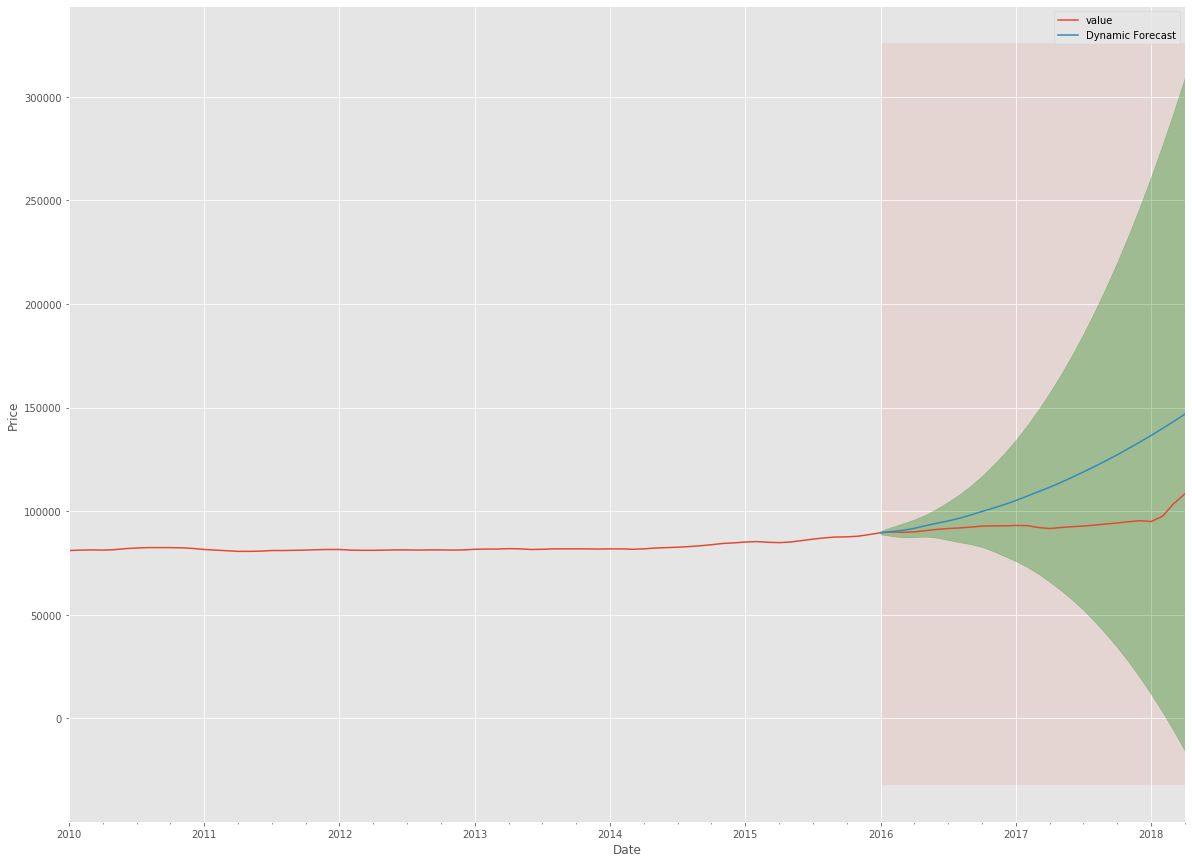

In [42]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [43]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 23276.05


In [23]:
print(mse)

541774495.6382282


## Producing and visualising forecasts

In [44]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

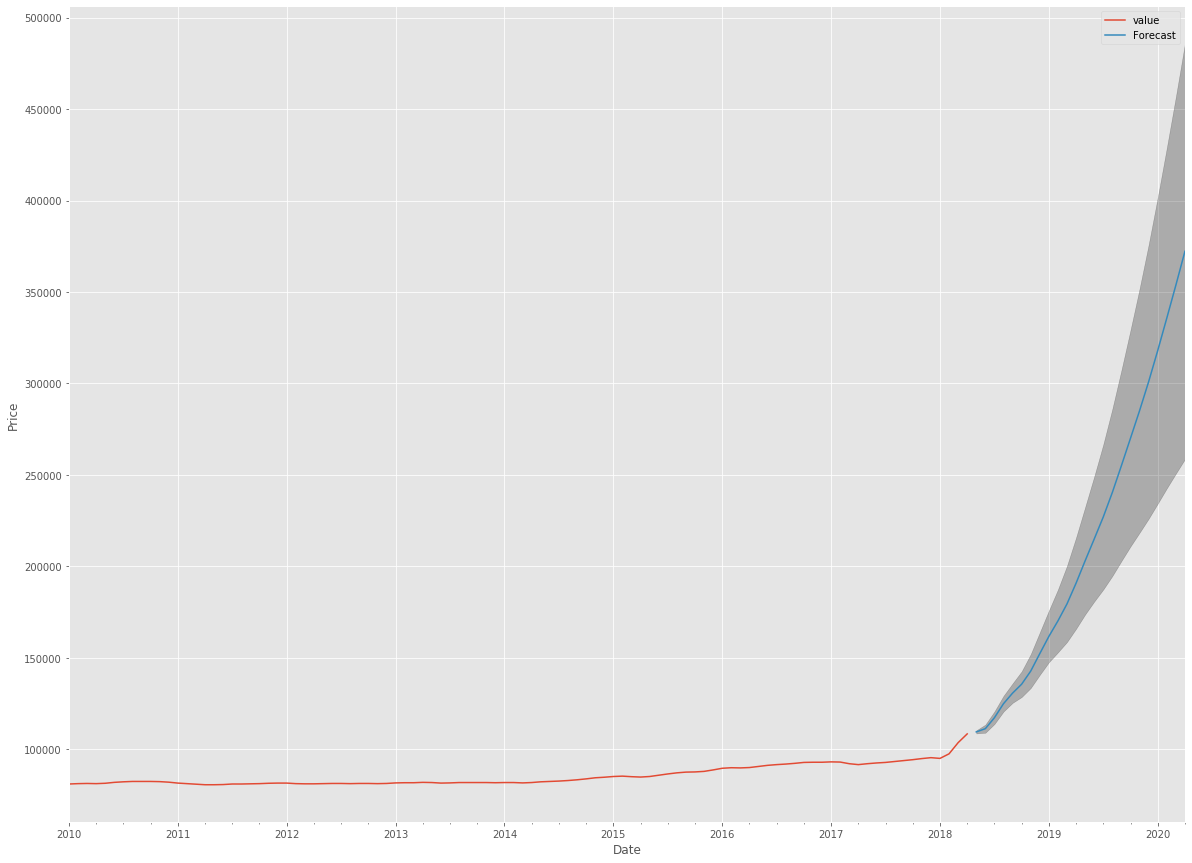

In [45]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [46]:
# predicted value on Jan 1st 2020?
prediction.predicted_mean['2020-01-01']

318008.4157595203

In [47]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  2.347457
